In [120]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

gpg: keybox '/tmp/tmpo245plfw/pubring.gpg' created
gpg: /tmp/tmpo245plfw/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
os.chdir("/content/drive/Colab Notebooks")

In [122]:
!ls ./ServerNets/rbf20/

F1_scorerbf_2000_275_60.dat	    train_acctop1rbf_2000_275_60.dat
test_acctop1rbf_2000_275_60.dat     train_acctop5rbf_2000_275_60.dat
test_acctop5rbf_2000_275_60.dat     train_errors1rbf_2000_275_60.dat
test_errors1rbf_2000_275_60.dat     train_errorstop5rbf_2000_275_60.dat
test_errorstop5rbf_2000_275_60.dat


In [20]:
!pip install --upgrade pip
!pip install sklearn matplotlib numpy
!pip install pandas tables

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (10.0.1)


Load Data

In [123]:
import pickle

#LSTM
f = open('./Servernets/LSTM', 'rb')
Glove_BI_LTSM_FC = pickle.load(f)
print(Glove_BI_LTSM_FC)
#NoBI-LSTM
f = open('./Servernets/NoBI-LSTM', 'rb')
Glove_LTSM_FC = pickle.load(f)
print(Glove_LTSM_FC)
#CNN
f = open('./Servernets/trainHistoryCNN', 'rb')
Glove_CNN_FC = pickle.load(f)

print(Glove_CNN_FC)
f.close()

{'val_loss': [2.5362309676128243, 2.1126327044983504, 1.8403123835230961, 1.7286100413023067, 1.6284713530528898, 1.6637539311787968, 1.6845740844531294, 1.7237008843012425, 1.7233948283031228, 1.7468310503749116, 1.8480557487289746, 1.8457821725005956, 1.9086440376492741, 1.927723656228189, 2.112411979215345, 2.2158345344400936, 2.294014602538048, 2.3239283015692136, 2.461852958397863, 2.4924634605400313], 'val_categorical_accuracy': [0.3430373605190695, 0.44298884054227455, 0.5312954877719667, 0.5642891801543053, 0.5967976711491599, 0.5963124698195164, 0.5987384766123354, 0.5958272684609526, 0.6055312956322286, 0.6050460942736648, 0.6176613295674035, 0.6200873363602225, 0.6055312956033084, 0.6171761282088397, 0.613779718698893, 0.6123241146232017, 0.6084425037836114, 0.6225133431241213, 0.6147501214449409, 0.618631732284531], 'val_top_k_categorical_accuracy': [0.6608442505374226, 0.7544881126534759, 0.8141678797857441, 0.8301795245894293, 0.8515283843662368, 0.8563803979518748, 0.855

In [0]:
from sklearn.externals import joblib
start=(0,0)


datatop1_rbf=joblib.load("./ServerNets/rbf20/test_acctop1rbf_2000_275_60.dat")
datatop1_linear=joblib.load("./ServerNets/linear20/test_acctop1linear_2000_275_60.dat")

datatop5_rbf=joblib.load("./ServerNets/rbf20/test_acctop5rbf_2000_275_60.dat")
datatop5_linear=joblib.load("./ServerNets/linear20/test_acctop5linear_2000_275_60.dat")
datatop1_rbf.insert(0,start)
datatop1_linear.insert(0,start)
datatop5_rbf.insert(0,start)
datatop5_linear.insert(0,start)

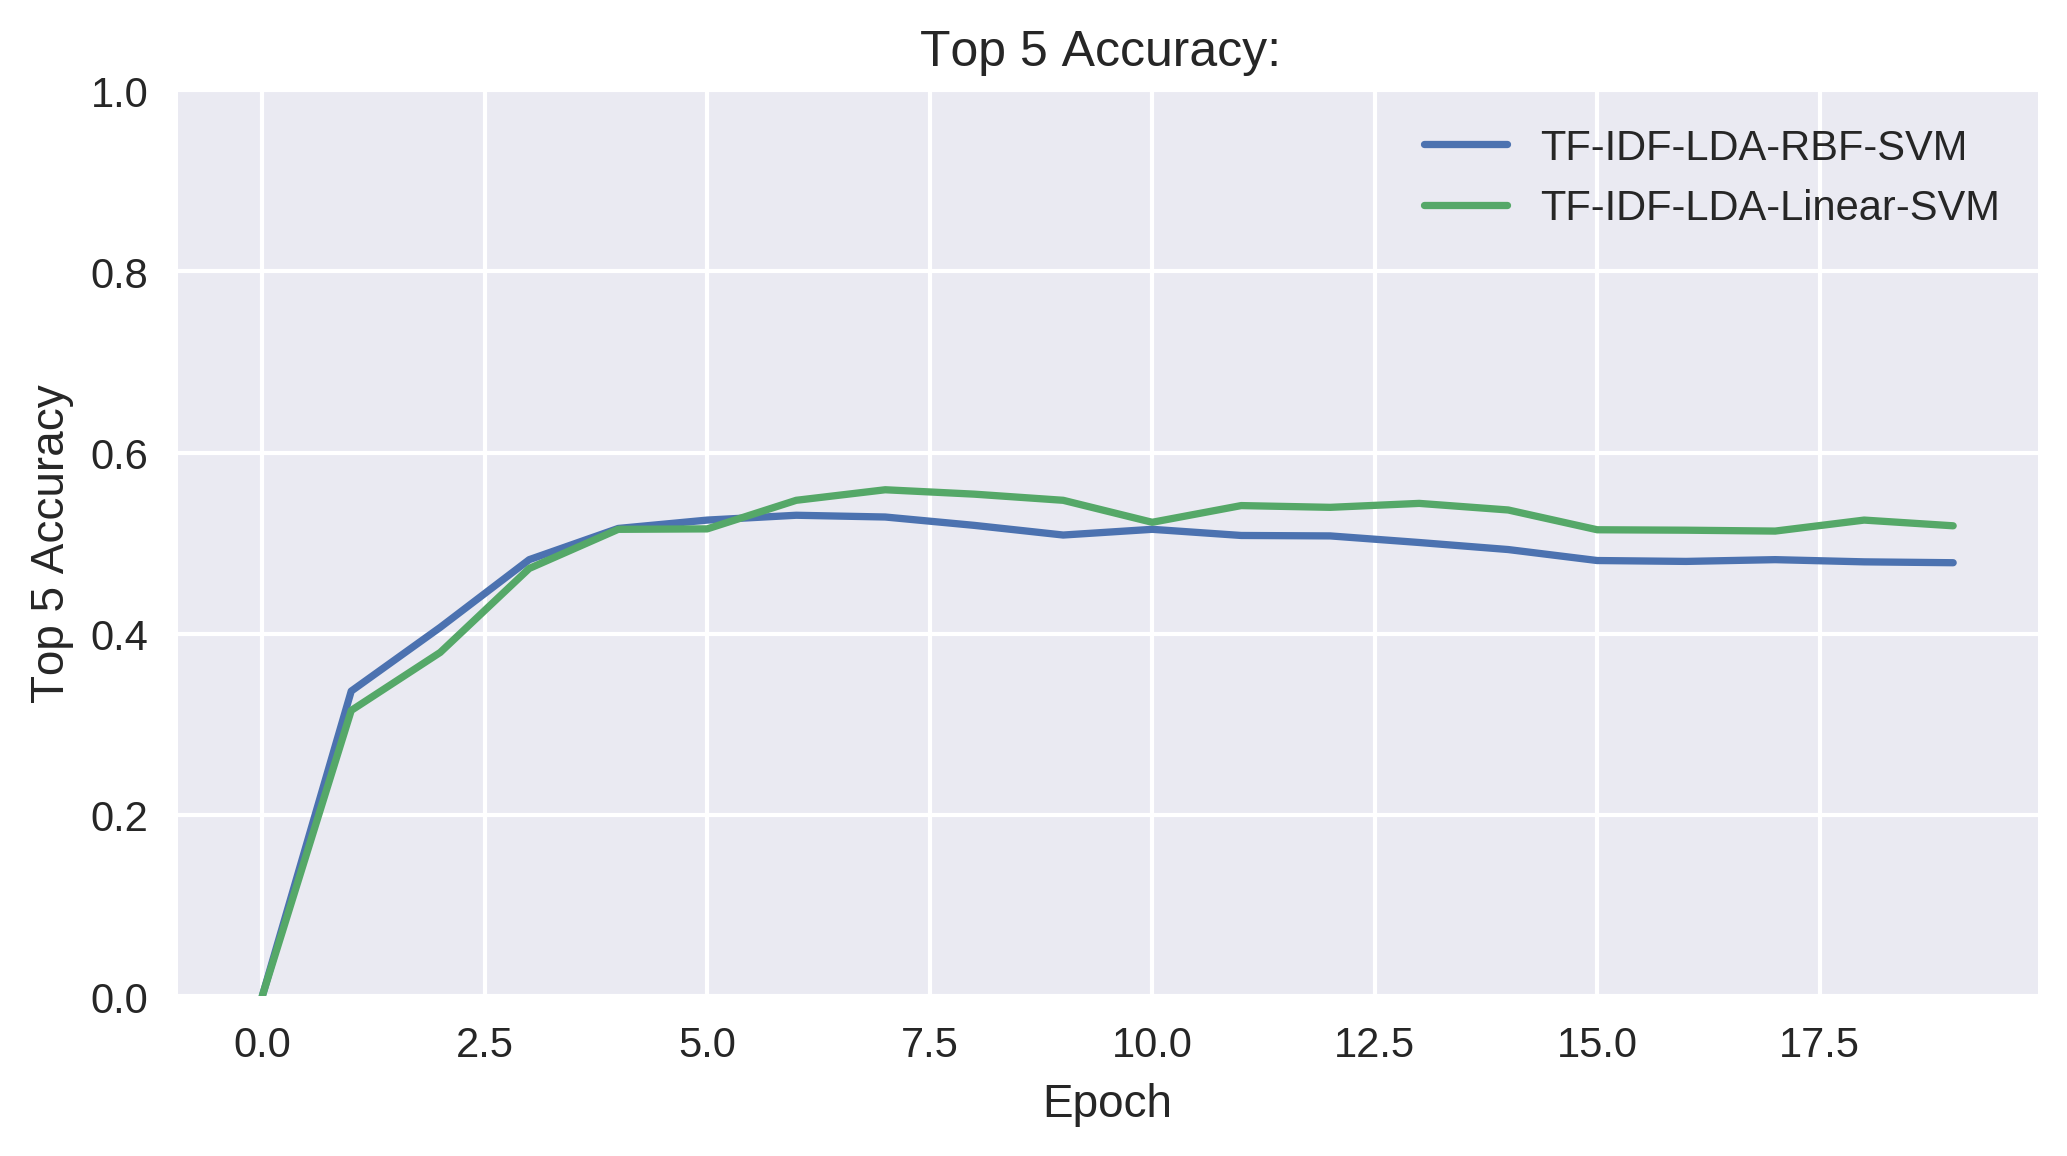

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=300)
plt.title("Top 5 Accuracy: ")
plt.xlabel("Epoch")
plt.ylabel("Top 5 Accuracy")
plt.ylim(0,1)
TFIDFLDA_RBF_SVM_top1=plt.plot(*zip(*datatop5_rbf[:20]),label="TF-IDF-LDA-RBF-SVM")
TFIDFLDA_Linear_SVM_top1=plt.plot(*zip(*datatop5_linear[:20]),label="TF-IDF-LDA-Linear-SVM")
plt.legend()
plt.show()

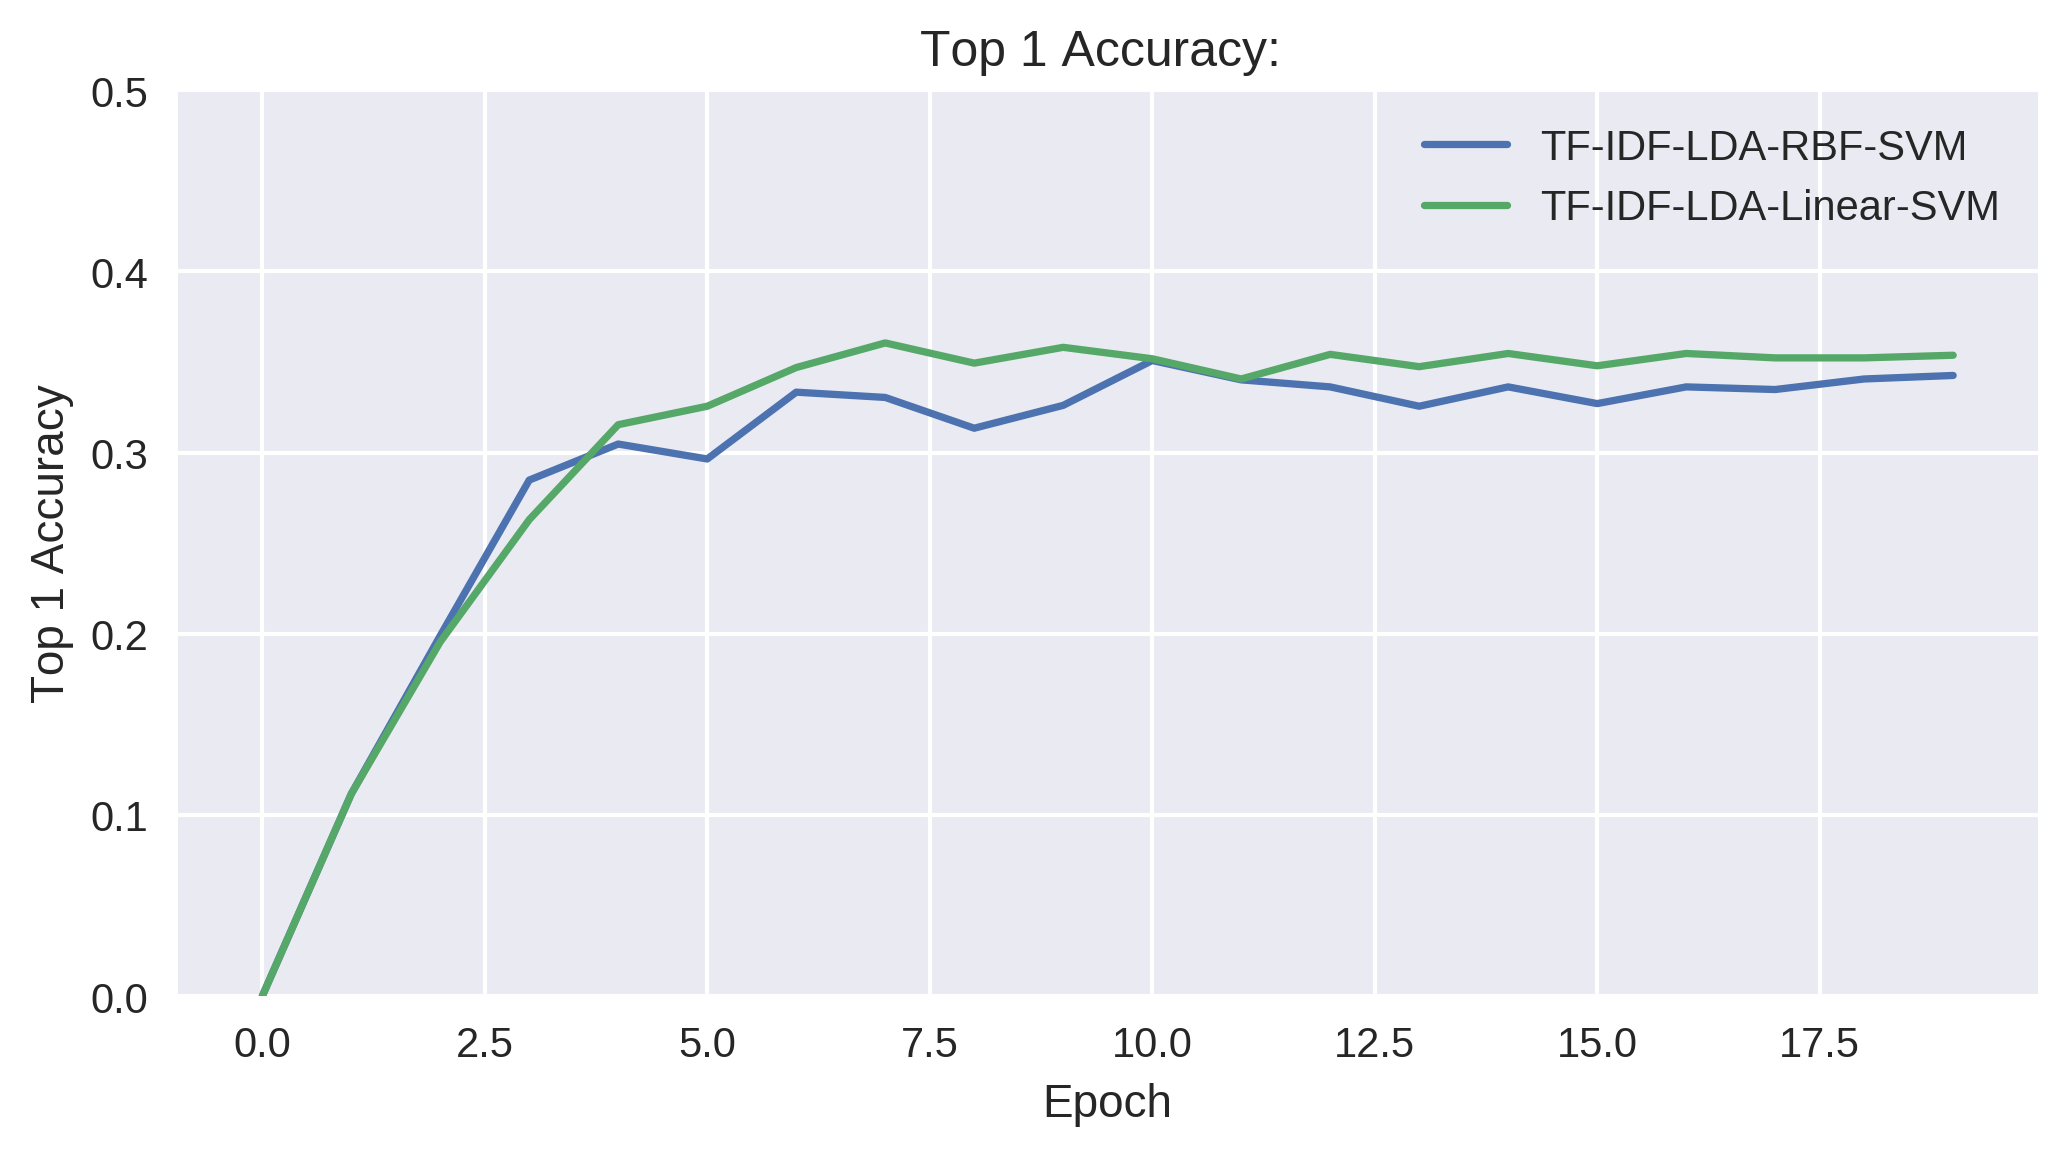

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=300)
plt.title("Top 1 Accuracy: ")
plt.xlabel("Epoch")
plt.ylabel("Top 1 Accuracy")
plt.ylim(0,0.5)

#Top1
TFIDFLDA_RBF_SVM_top1=plt.plot(*zip(*datatop1_rbf[:20]),label="TF-IDF-LDA-RBF-SVM")
TFIDFLDA_Linear_SVM_top1=plt.plot(*zip(*datatop1_linear[:20]),label="TF-IDF-LDA-Linear-SVM")
plt.legend()
plt.show()

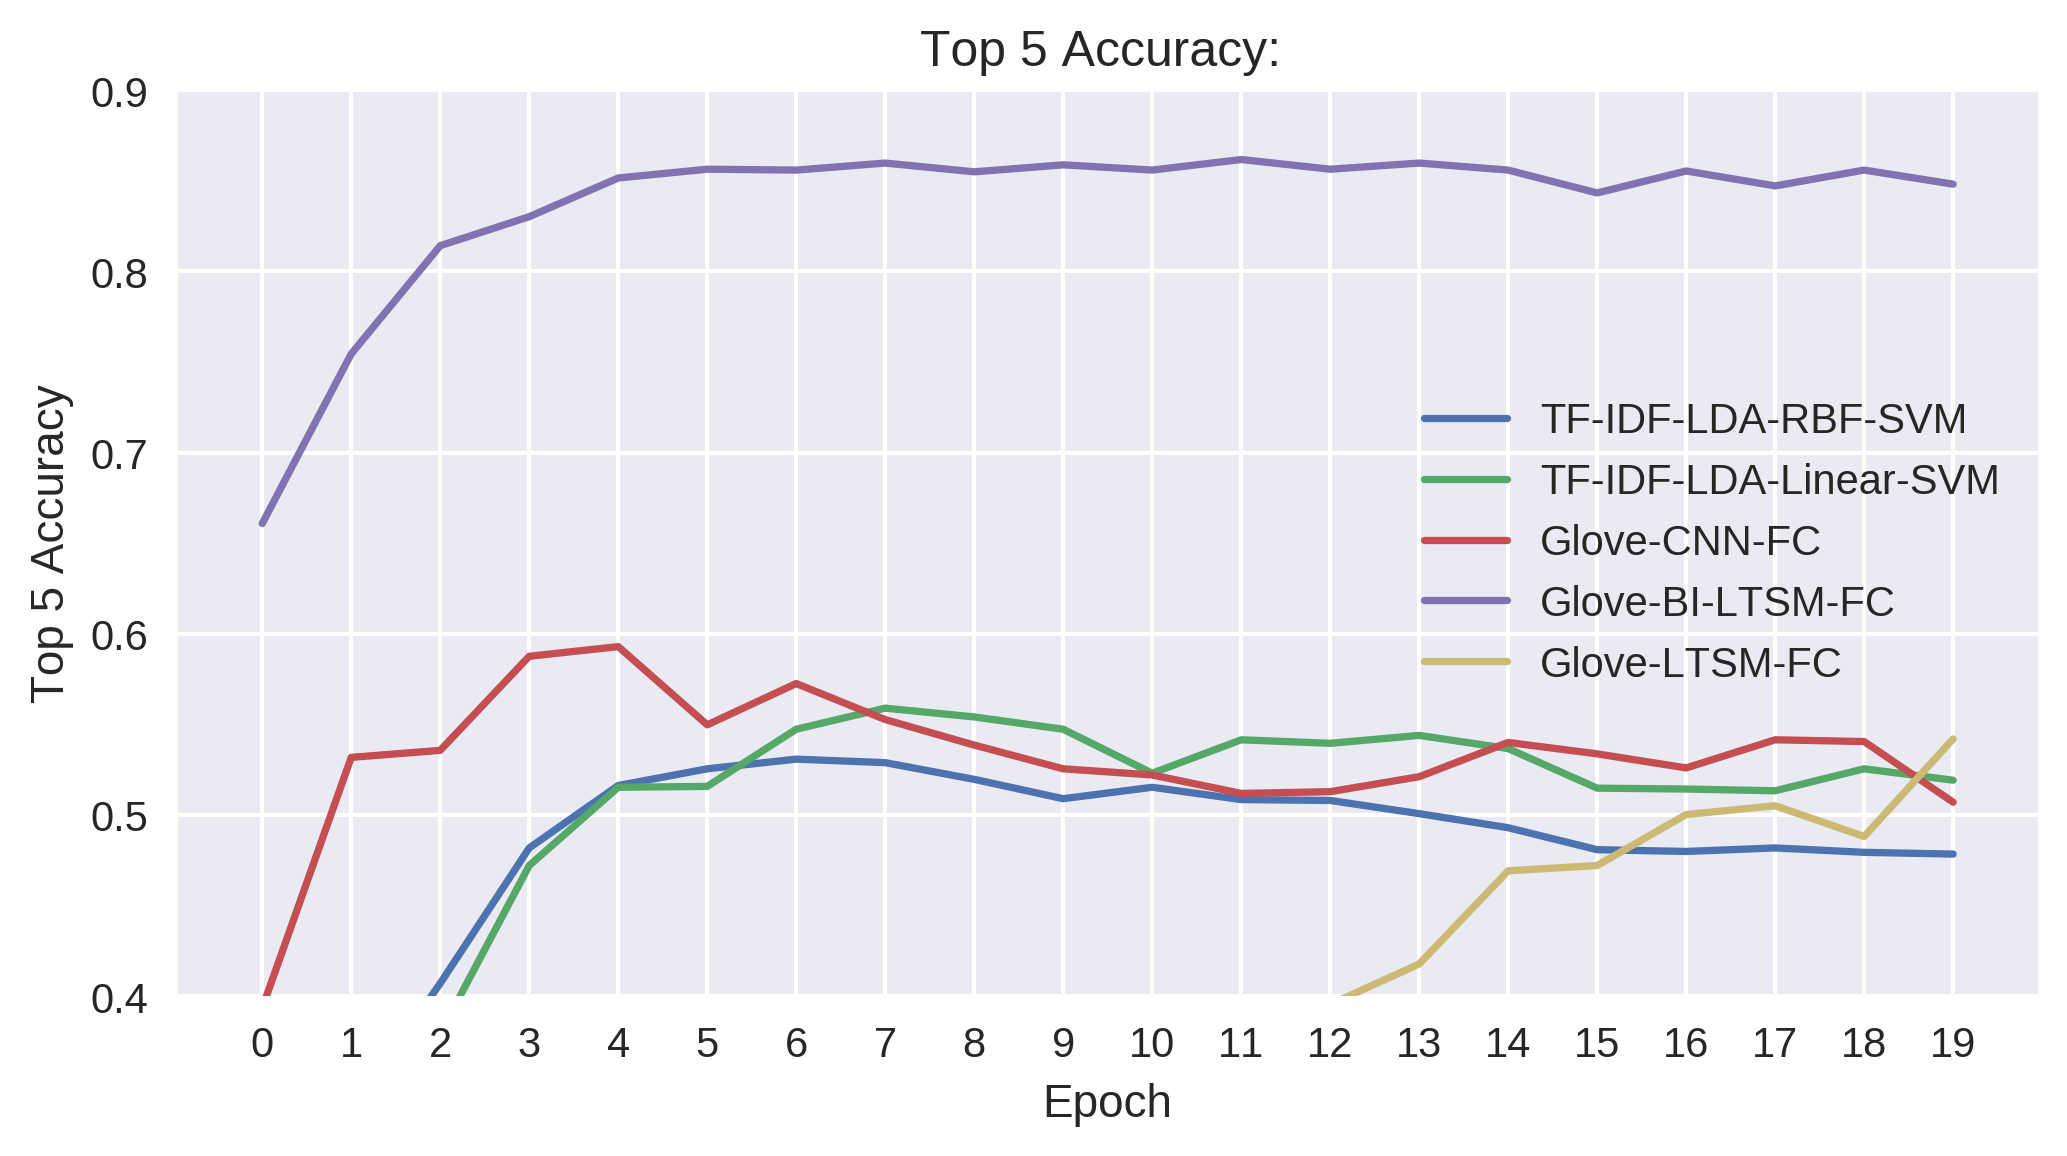

In [150]:
# plot metrics
plt.figure(figsize=(8, 4), dpi=300)

plt.title("Top 5 Accuracy: ")
plt.xlabel("Epoch")
plt.ylabel("Top 5 Accuracy")
plt.xticks(range(0,20,1))
plt.ylim(0.4,0.9)
plt.plot(*zip(*datatop5_rbf[:20]),label="TF-IDF-LDA-RBF-SVM")
plt.plot(*zip(*datatop5_linear[:20]),label="TF-IDF-LDA-Linear-SVM")
plt.plot(Glove_CNN_FC['val_top_k_categorical_accuracy'], label="Glove-CNN-FC")

plt.plot(Glove_BI_LTSM_FC['val_top_k_categorical_accuracy'], label="Glove-BI-LTSM-FC")
plt.plot(Glove_LTSM_FC['val_top_k_categorical_accuracy'], label="Glove-LTSM-FC")
plt.legend()
plt.show()

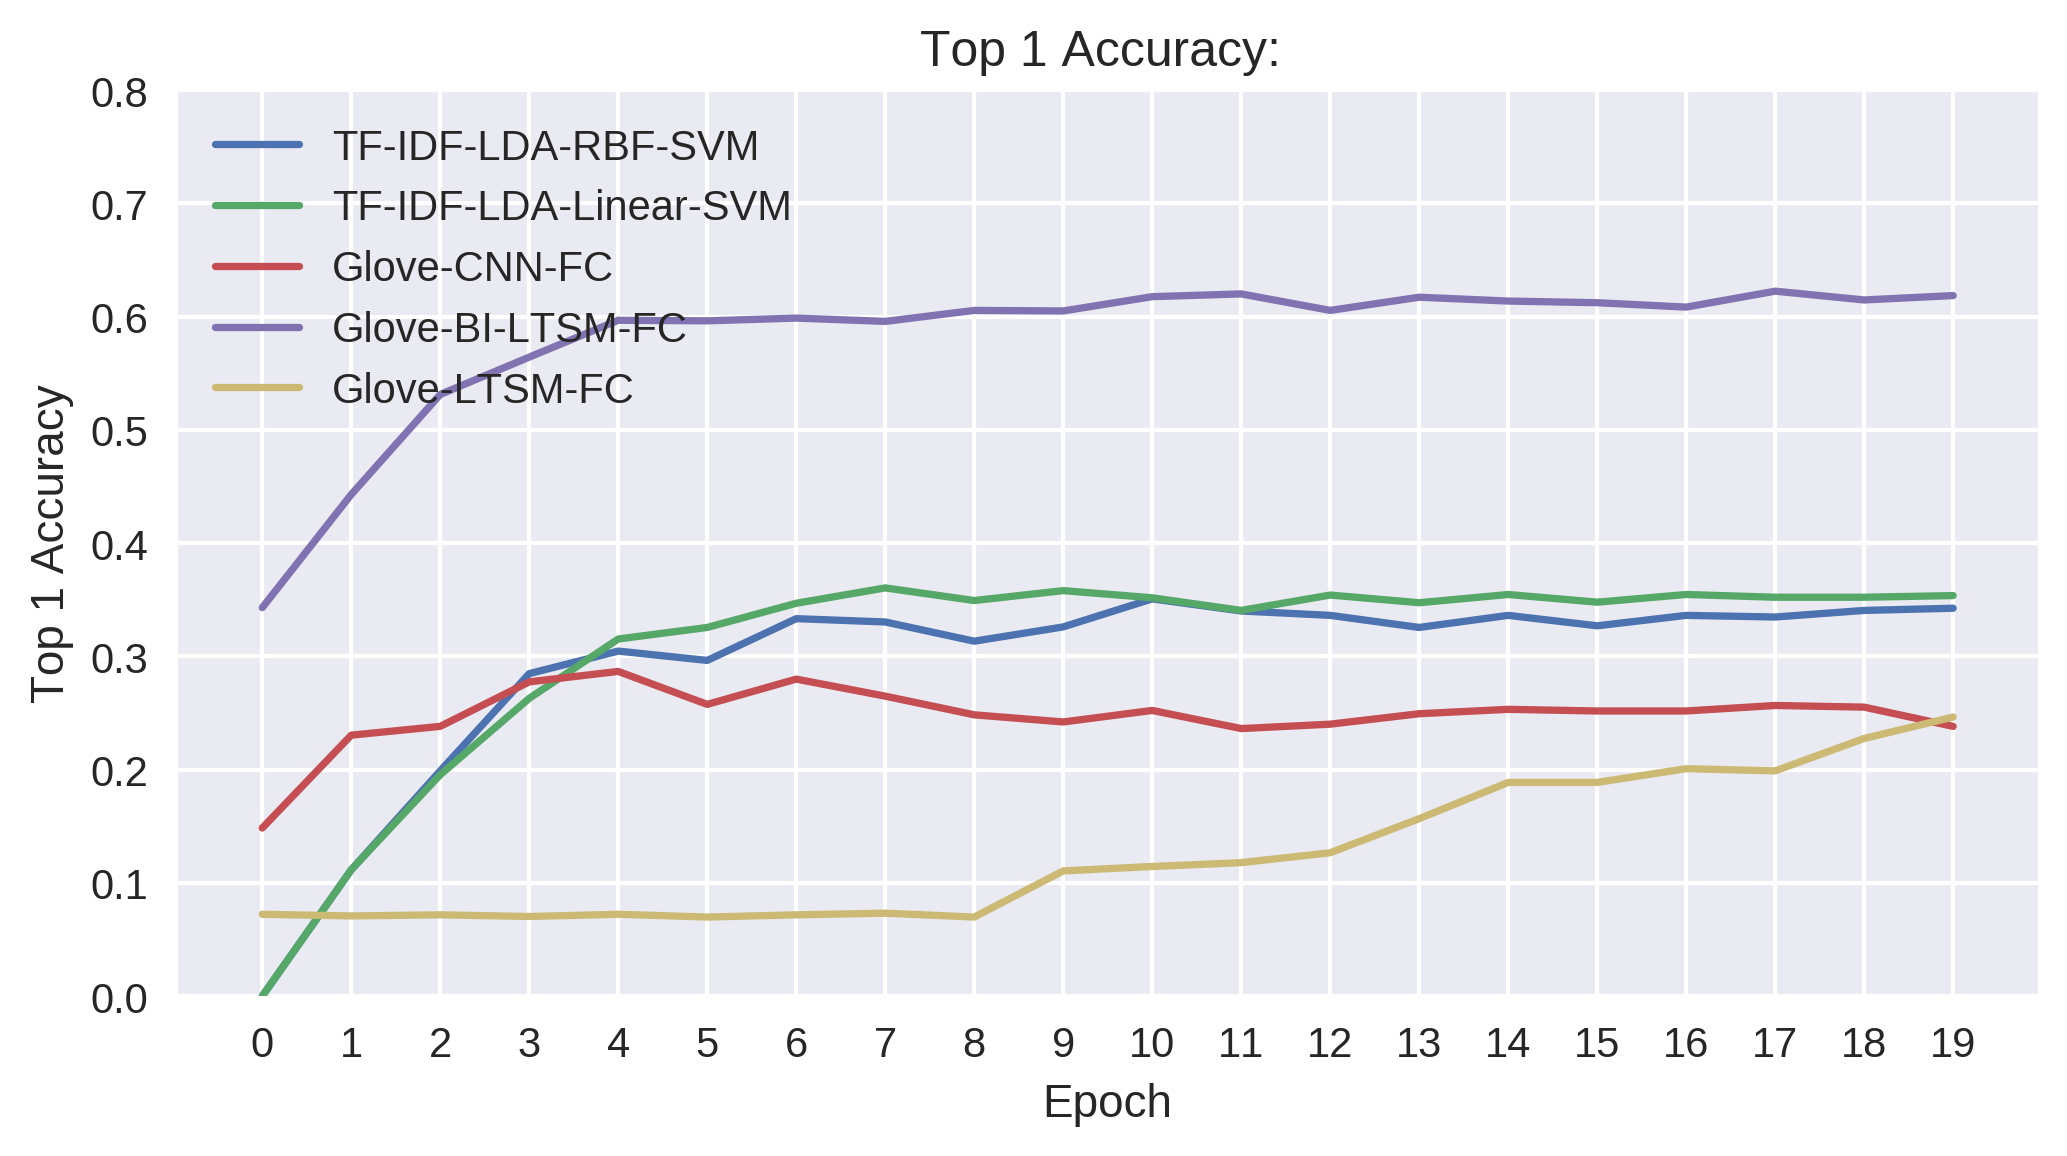

In [142]:
# plot metrics
plt.figure(figsize=(8, 4), dpi=300)
plt.title("Top 1 Accuracy: ")
plt.xlabel("Epoch")
plt.ylabel("Top 1 Accuracy")
plt.xticks(range(0,20,1))
plt.ylim(0,0.8)
#Top10
plt.plot(*zip(*datatop1_rbf[:20]),label="TF-IDF-LDA-RBF-SVM")
plt.plot(*zip(*datatop1_linear[:20]),label="TF-IDF-LDA-Linear-SVM")

plt.plot(Glove_CNN_FC['val_categorical_accuracy'], label="Glove-CNN-FC")

plt.plot(Glove_BI_LTSM['val_categorical_accuracy'], label="Glove-BI-LTSM-FC")
plt.plot(Glove_LTSM_FC['val_categorical_accuracy'], label="Glove-LTSM-FC")


plt.legend()
plt.show()